<a href="https://colab.research.google.com/github/tjdux/ML/blob/main/14_principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 차원과 차원 축소
- 차원 (dimension)
  - 데이터가 가진 속성인 특성을 차원이라고도 부름
    - 과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성 (차원)
  - 차원을 줄일 수 있다면 저장 공간을 크게 절약 가능
  - ⚠️ 다차원 배열에서의 차원은 배열의 축 개수, 1차원 배열 (벡터)에서는 원소의 개수
- 차원 축소 (dimensionality reduction)
  - 비지도 학습 작업 중 하나
  - 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법
  - 줄어든 차원을 손실을 최대한 줄이면서 원본 차원으로 복원할 수도 있음
- 주성분 분석 (principal component analysis)
  - 대표적인 차원 축소 알고리즘
  - PCA

## 주성분 분석 소개
- 목적: 데이터를 잘 설명할 수 있는 새로운 축을 찾아서, 그 축을 기준으로 차원을 축소하는 것
- 데이터에 있는 분산이 큰 방향을 찾는 것
  - 분산: 데이터가 널리 퍼져있는 정도
  - 분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터
- 분산이 큰 직선이 원점에서 출발한다면 두 원소로 이루어진 벡터로 쓸 수 있음
  - 데이터가 퍼져 있는 방향을 찾음
  - 이 벡터를 주성분 (principal component): 데이터를 가장 잘 설명하는 새 좌표축
  - 첫 번째 주성분은 가장 분산이 큰 방향
  - 원본 데이터에 있는 어떤 방향
  - 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 동일
- 원본 데이터는 주성분을 사용해 차원을 줄일 수 있음
  - **주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어듦**
  - 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것
- 첫 번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 다음으로 큰 방향을 찾기
  - 이 벡터가 두번째 주성분
  - 일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있음

## PCA 클래스

In [1]:
# 데이터 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-05-04 12:27:18--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-05-04 12:27:18--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-05-04 12:27:19--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
# 넘파이 배열로 적재
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
# PCA 클래스
# n_components: 주성분 개수 지정
# 비지도 학습 -> fit() 메서드에 타깃값을 제공하지 않음
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# PCA.components_: PCA 클래스가 찾은 주성분 저장
pca.components_.shape

(50, 10000)

- 50개의 주성분
- 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000

In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='grey_r')
      axs[i, j].axis('off')

  plt.show()

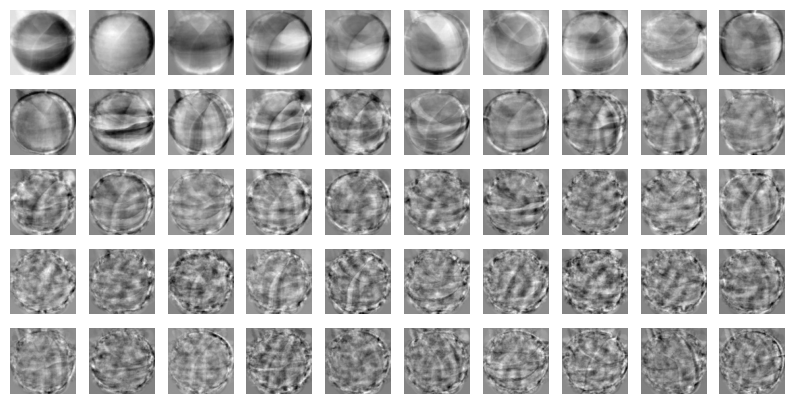

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

- 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
- 데이터 셋에 있는 어떤 특징을 잡아낸 것

In [7]:
# 특성 개수 줄이기
# 원본 데이터를 각 주성분으로 분해하는 것
print(f"before: {fruits_2d.shape}")
fruits_pca = pca.transform(fruits_2d)
print(f"after: {fruits_pca.shape}")

before: (300, 10000)
after: (300, 50)


## 원본 데이터 재구성

In [9]:
# PCA.inverse_transform(): 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

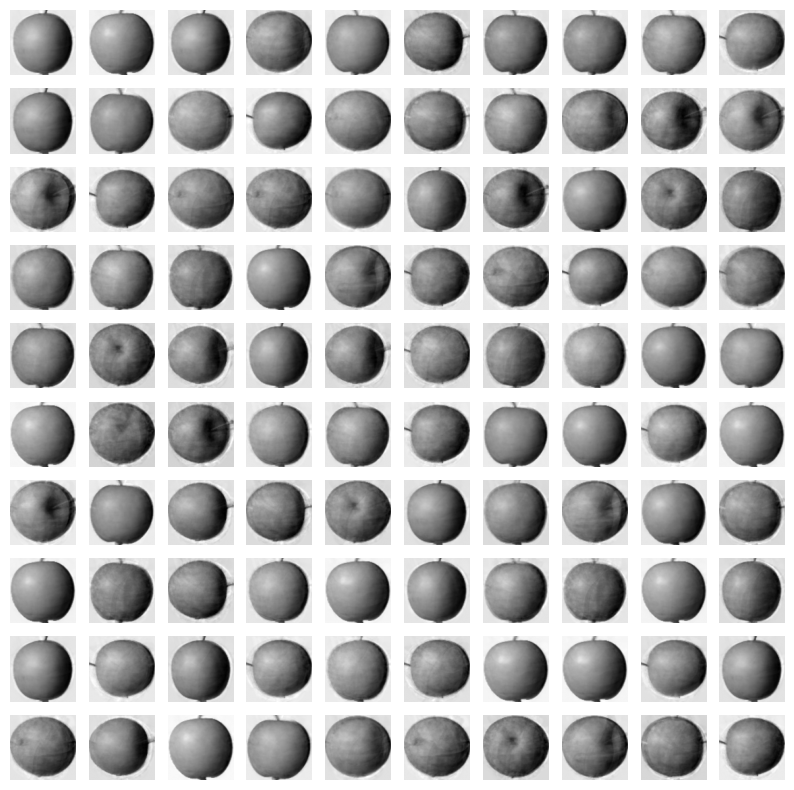

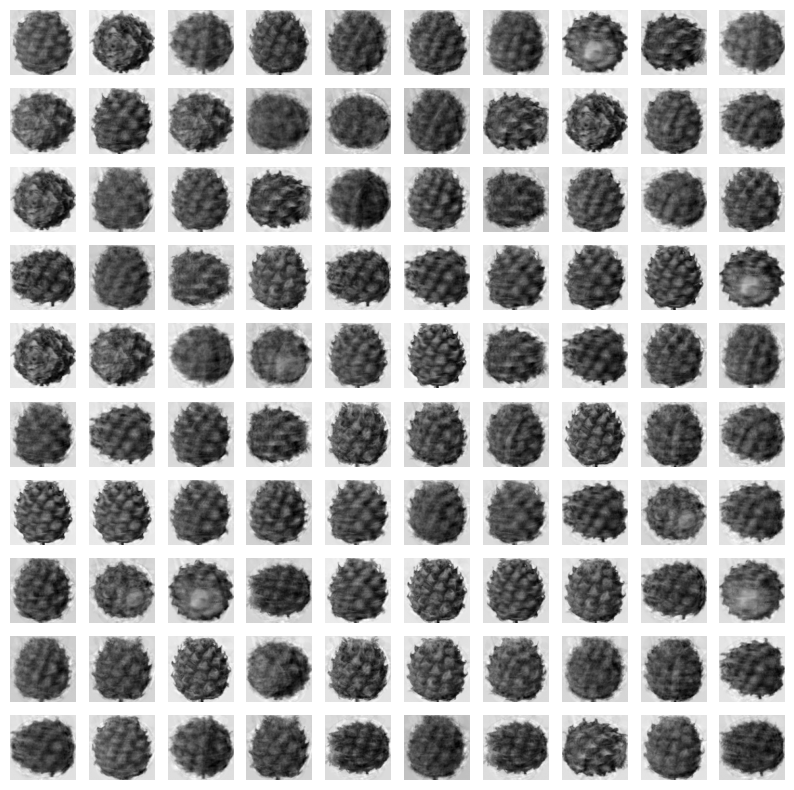

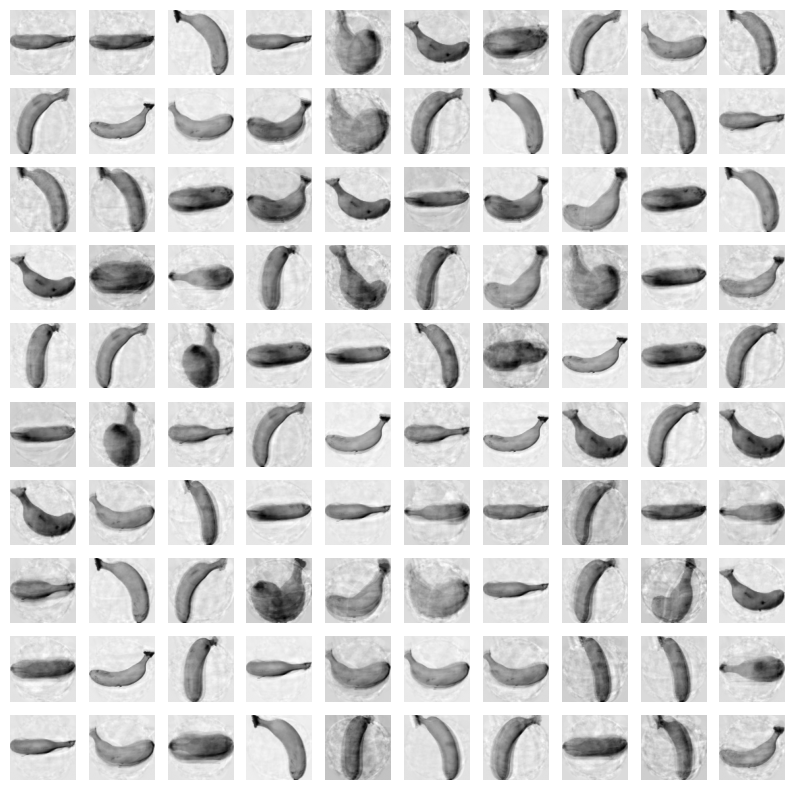

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

## 설명된 분산
- 설명된 분산 (explained variance)
  - 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
  - 첫 번째 주성분의 설명된 분산이 제일 큼
  - 이 분산 비율을 모두 더하면 총 분산 비율을 얻을 수 있음

In [14]:
# PCA.explained_variance_ratio_: 각 주성분의 설명된 분산 비율이 기록
np.sum(pca.explained_variance_ratio_)

np.float64(0.921556989680742)

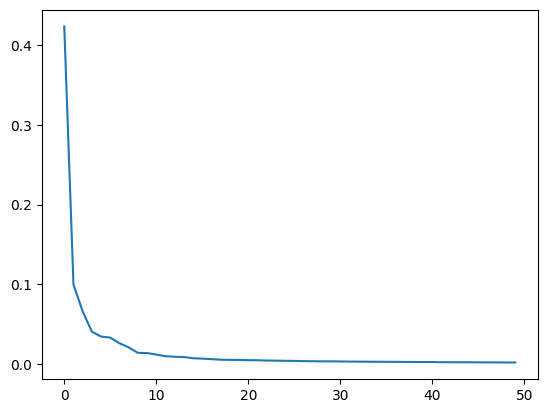

In [15]:
# 설명된 분산의 비율을 그래프로 그리면 적절한 주성분의 개수를 찾는 데 도움
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현

## 다른 알고리즘과 함께 사용하기

In [16]:
# LogisticRegression 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [18]:
# 타깃값 만들기
# 🍎: 0, 🍍: 1, 🍌 : 2

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [20]:
# 원본 데이터 fruits_2d 사용
# 교차 검증 수행
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(f"교차 검증 점수: {np.mean(scores['test_score'])}")
print(f"훈련 시간: {np.mean(scores['fit_time'])}")

교차 검증 점수: 0.9966666666666667
훈련 시간: 1.8088926315307616


In [21]:
# fruits_pca 사용

scores = cross_validate(lr, fruits_pca, target)
print(f"교차 검증 점수: {np.mean(scores['test_score'])}")
print(f"훈련 시간: {np.mean(scores['fit_time'])}")

교차 검증 점수: 0.9966666666666667
훈련 시간: 0.01383986473083496


- 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음

In [22]:
# n_components 매개변수에 원하는 설명된 분산의 비율 입력 가능
# 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [23]:
# 찾은 주성분 개수
pca.n_components_

np.int64(2)

- 2개의 특성만으로 원본 데이터에 있는 분산의 50% 표현

In [24]:
# 원본 데이터 변환

fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [25]:
# 교차 검증

scores = cross_validate(lr, fruits_pca, target)
print(f"교차 검증 점수: {np.mean(scores['test_score'])}")
print(f"훈련 시간: {np.mean(scores['fit_time'])}")

교차 검증 점수: 0.99
훈련 시간: 0.027001667022705077


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# k-평균 알고리즘 사용
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


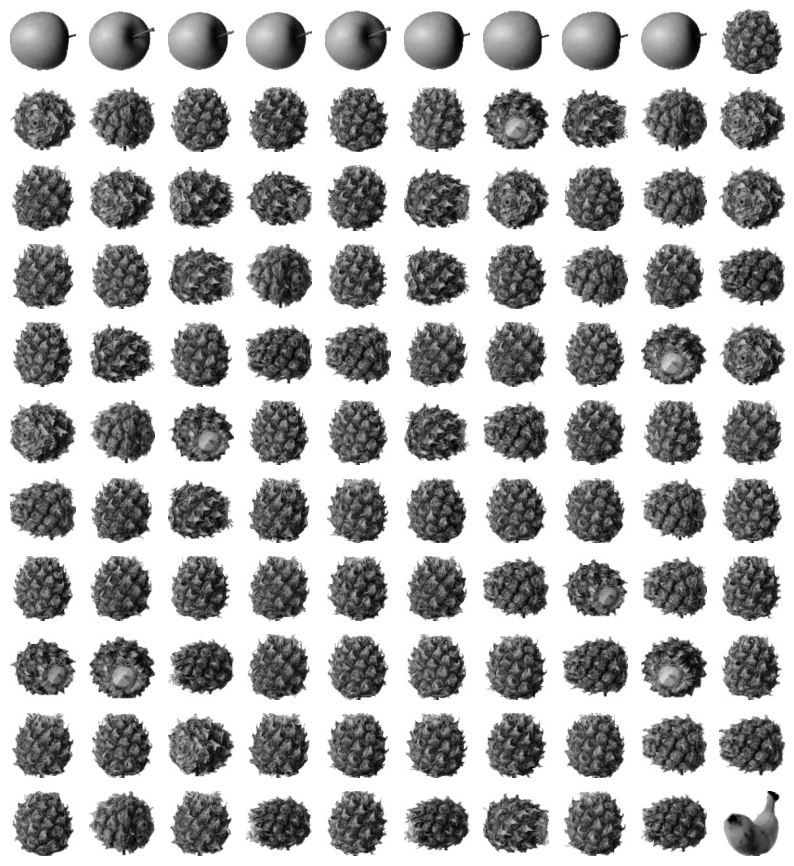

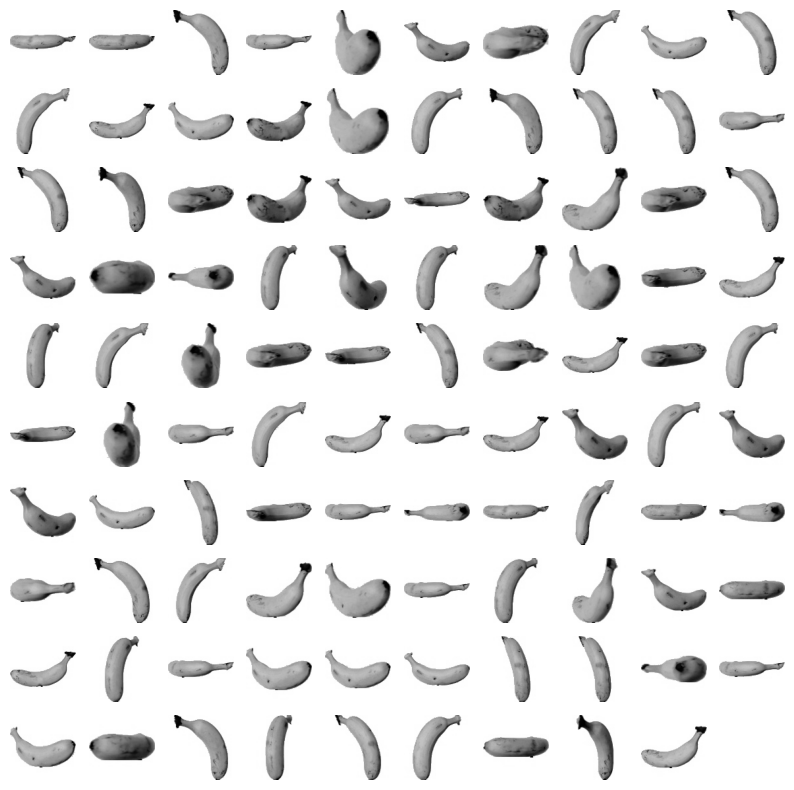

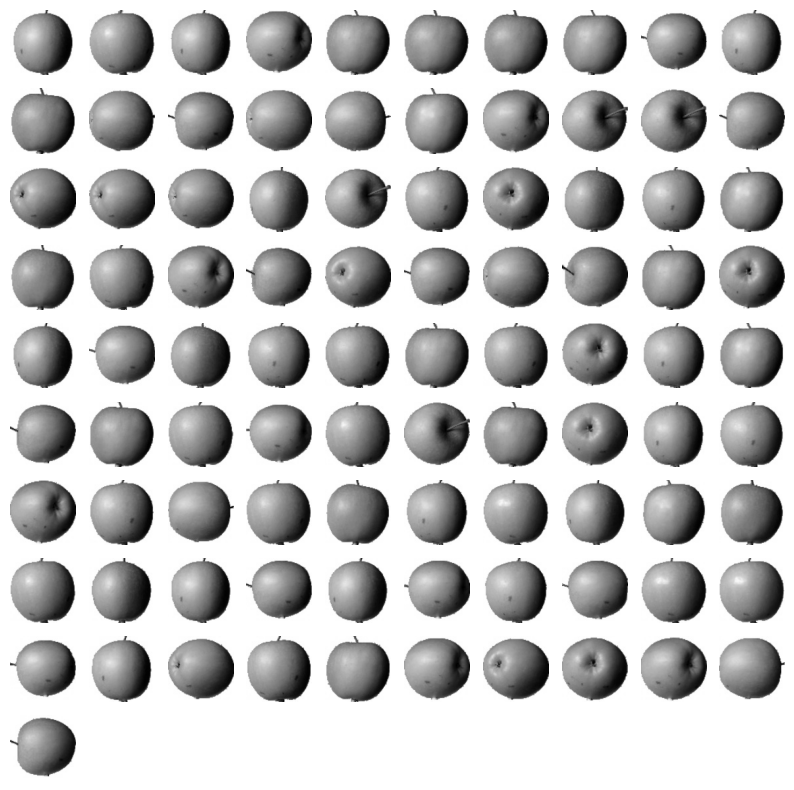

In [27]:
# k-평균 알고리즘을 통해 찾은 클러스터의 이미지 출력

for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

- 훈련 데이터의 차원을 줄였을 때 또 하나의 장점: 시각화에 유용

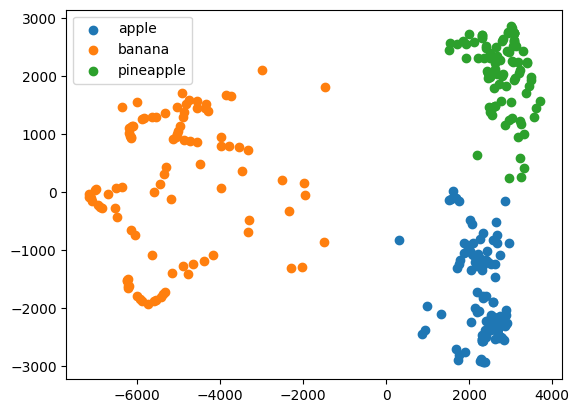

In [28]:
# 클러스터별 산점도

for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()